<h1>Iteration as fixed points</h1>

<h2>General Framework</h2>

<p>A general framework for Newton's method is</p>


$$
x_{n+1} = F(x_n), \quad (n\geq 0)
$$


<p>Where $F(u) = u - f(u)/f'(u)$.</p>

<p>What conditions on $F$ ensure that this sequence will converge? For the specific case of Newton's method, the following can work:</p>

<p>Suppose $f(z) = 0$ and $f$ is twice differentiable around $z$. If there is some $\delta > 0$ such that $|f''(y)/f'(x)| < 2/\delta$ whenever $|x-z|, |y-z| < \delta$, then the algorithm will converge to $z$.</p>

<h2>A fixed point</h2>

<p>Suppose $x_n \rightarrow s$. Then if $F$ is continuous we have</p>


$$
s = \lim x_{n+1} = \lim F(x_n) = F(s)
$$


<p>That is $s = F(s)$, so $s$ is a <strong>fixed point</strong> of $F$.</p>

<h3>What general assumptions on $F$ will ensure a fixed point exists?</h3>

<blockquote>
<p>Theorem: Contractive Mapping Theorem</p>
</blockquote>

<p>Suppose $C \subset R$, and $F$ is a <em>contractive mapping</em>, that is there exists $\lambda < 1$ with</p>


$$
| F(x) - F(y) | \leq \lambda |x - y|
$$


<p>The $F$ has a unique fixed point, $s$. Furthermore, for any $x_0 $ in $C$, the sequence $x_{n+1} = F(x_n)$ will converge to $s$.</p>

<h3>Example</h3>

<p>Let $f(x) = x^2 - s$ and $C$ is a ball around $\sqrt{s}$. Then Newton's method has $F(x) = x - f(x)/f'(x)$, so we have:</p>

<p>Then $F(x) = x - (x^2 - s)/(2x) = x/2 - s/(2x)$. So</p>


$$
F(x) - F(y) = \frac{x-y}{2} - \frac{s}{2}[\frac{1}{x} - \frac{1}{y}] = (x-y) \cdot \frac{1}{2}[1 + \frac{s}{xy}].
$$


<p>Thus,</p>


$$
\frac{|F(x) - F(y)|}{|x-y|} \leq \frac{1}{2}[1 + \frac{s}{xy}].
$$


<p>For a specific case with $s=2$ we can use $C=(\sqrt{2}-\delta, \sqrt{2}+\delta)$ where $\delta = 1/10$, say.</p>

In [1]:
s, delta = sqrt(2), 1/10
1/2 * (1 + s/( (s-delta)*(s-delta)))

0.9094049721433702

<h2>Proof of contractive mapping theorem</h2>

<p>We have</p>


$$
|x_n - x_{n-1}| = |F(x_{n-1}) - F(x_{n-2})| \leq \lambda |x_{n-1} - x_{n-2}|.
$$


<p>So, by repeating, we get</p>


$$
|x_n - x_{n-1}| \leq \lambda^{n-1} |x_1 - x_0|.
$$


<p>This implies the sequence $x_n$ will converge:</p>

<p>We write</p>


$$
x_n = (x_n - x_{n-1}) + (x_{n-1} - x_{n-2}) + \cdots + (x_1 - x_0) + x_0
$$


<p>So the sequence of $x_n$ will converge only if the series $\sum_{i=0}^n (x_i -x_{i-1})$ converges. In this case it is easy to see, as</p>


$$
\sum_{i=0}^n (x_i -x_{i-1}) \leq \sum \lambda^{i-1} |x_1 - x_0| = |x_1 - x_0| \cdot \sum \lambda^{i-1}  \rightarrow \frac{1}{1 - \lambda} |x_1 - x_0|.
$$


<p>Let $s = \lim x_n$. Then $F(s) = s$ by continuity (why is $F$ continuous).</p>

<p>Is this fixed point unique? Suppose $s$ and $t$ are different fixed points in $C$. Then</p>


$$
|s - t|  = |F(s) - F(t)| \leq \lambda |s-t| < |s -t|
$$


<p>A contradiction.</p>

<h3>Cauchy</h3>

<p>A Cauchy sequence is one where for any $\epsilon > 0$, there is an $N$ for which if $n,m \geq N$, then $|x_n - x_m| < \epsilon$. Cauchy sequences on the real line converge. Another way to prove the convergence would be to prove that the sequence is cauchy. The book shows (p103), that this bound could be found:</p>


$$
|x_n - x_m| \leq \lambda^N |x_1 - x_0| (1 - \lambda)^{-1}.
$$


<p>Since both $|x_1 - x_0|$ and $(1 - \lambda)^{-1}$ are bounded, some $N$ can be chosen to make this as small as desired.</p>

<h3>Example</h3>

<p>Let $F(x) = 4 + 1/3 \cdot \sin(2x)$. The book shows that this is a contractive mapping with $\lambda=2/3$:</p>


$$
F(x) - F(y) = \frac{1}{3}(\sin(2x) - \sin(2y)) = \frac{1}{3}(2\cos(2\xi))( x- y) = \cos(2\xi) \cdot \frac{2}{3} \cdot (x-y).
$$


<h3></h3>

<p>So we have a contractive map. It will converge for <em>any</em> starting point, as $C$ did not need specifying. Let's see.</p>

In [1]:
function iterate(f, x)
  xn, xn_1 = x, Inf
  while abs(xn - xn_1) > 100 * eps()
    xn, xn_1 = f(xn), xn
  end
  xn
end

iterate (generic function with 1 method)

In [1]:
f(x) = 2 + 1/3 * sin(2x)
iterate(f,4), iterate(f, 40)

(1.833063392382903, 1.833063392382903)

<h2>Error analysis</h2>

<p>Suppose $F$ is a contractive map over $C$ and iteration converges to $s$. How fast? Supppose further that $F$ is $C^k$.</p>

<p>Let $e_n = x_n - s$, as before. Then the mean value theorem gives us:</p>


$$
e_{n+1} = x_{n+1} - s = F(x_n) - F(s) = F'(\xi_n) (x_n - s) = F'(\xi_n) e_n.
$$


<p>Since $|F'(\xi_m)| < 1$, we must have the sequence $|e_n|$ decreasing. As $F'(\xi_n) \approx F'(s)$, if the latter is small the convergence should be rapid. If it is $0$ even more so.</p>

<p>The book defines $q$ to be the first positive integer with $F^{(q)}(s) \neq 0$. With this, the Taylor series for $F$ about $s$ becomes:</p>


$$
\begin{align}
F(x_n) - F(s) &= x_{n+1} - s = e_{n+1}\\\\
&= F(s + e_n) - F(s)\\\\
&= [F(s) + F'(s) \cdot e_n + 1/2 F''(s) e_n^2 + \cdots] - F(s)\\\\
&= F'(s) e_n + (1/2) F''(s) e_n + \cdot (1/(q-1)!) F^{(q-1)}(s) e_n^{q-1}(s) + \frac{1}{q!}F^{(q)}(\xi_n) e_n^q \\\\
&= \frac{F^{(q)}(\xi_n)}{q!} e_n^q.
\end{align}
$$


<p>So that</p>


$$
\lim_n \frac{|e_{n+1}|}{|e_n|^q} = \lim \frac{1}{q!}F^{(q)}(\xi_n) \rightarrow \frac{1}{q!}F^{(q)}(s).
$$


<p>So the <em>order of convergence</em> is atleast $q$.</p>

<h3>Newton, order of convergence at least $2$</h3>

<p>For Newton's method, $F(u) = u - f(u)/f'(u)$. We have</p>


$$
F'(u) = 1 - \frac{f'(u)^2 - f(u) f''(u)}{f'(u)^2} = \frac{f(u)f''(u)}{f'(u)^2}.
$$


<p>If $s$ is a fixed point, $f(s) = 0$, so $F'(s)=0$. That is $q \geq 2$.</p>

<h3>Halley, order of convergence is 3 (or more)</h3>

<p>Halley's method, a zero-finding method like Newton's method, is summarized by</p>


$$
F(x) = x - 2f(x)\cdot f'(x) / (2f'(x)^2 - f(x)\cdot f''(x)).
$$


<p>We can verify it has order 3 or more by showing $F''(s) = 0$, but $F'''(s) \neq 0$ in general.</p>

<p>We use <code>SymPy</code> as the derivatives are involved:</p>

In [1]:
using SymPy
@vars x
u = SymFunction("u")
F(x) = x - 2u(x)*u'(x) / (2u'(x)^2 - u(x) * u''(x))

F (generic function with 1 method)

<p>First we verify that $F'(s)$ and $F''(s)$ are $0$ where $u(s) = 0$.</p>

In [1]:
@vars up upp uppp
diff(F(x),x) |> simplify

<p>If it hard to see $u(x)$ as a factor, we can substitute:</p>

In [1]:
ex = diff(F(x), x)
ex(u'''(x) => uppp, u''(x)=>upp, u'(x) => up)(u(x) => 0)

<p>We can see for $F^{(2)}$ with:</p>

In [1]:
ex = diff(F(x), x, x)
ex(u'''(x) => uppp, u''(x)=>upp, u'(x) => up)(u(x) => 0)

<p>Finally, for $q=3$ we have:</p>

In [1]:
ex = diff(F(x), x, x, x)  # third derivative
ex(u'''(x) => uppp, u''(x)=>upp, u'(x) => up)(u(x) => 0)

<p>As this is not zero in general, the convergence is cubic except possibly in special cases.</p>

<h3>visualize</h3>

<p>If we graph $F(x)$ and layer on the line $y=x$, we can see cobwebbing converges to a fixed point.</p>

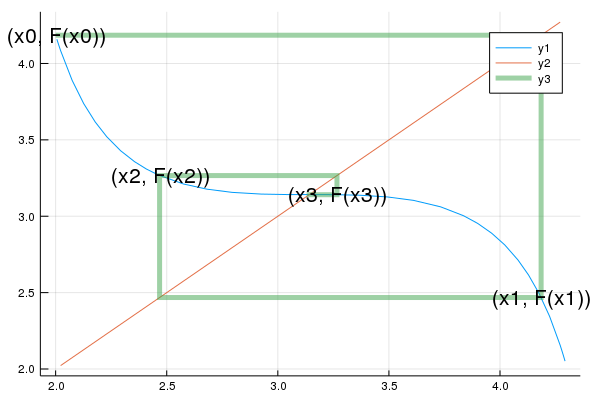

In [1]:
using Plots

F(x) = x - sin(x)/cos(x)
a,b = 2.0, 4.3
x0 = 2.0


plot(F, a, b)
plot!( x ->x, a, b)

xs = [x0]
ys = F.(xs)


for i = 0:3
  global x0
  annotate!([(x0, F(x0), "(x$i, F(x$i))")])
  x0 = F(x0)
end

for i in 1:5
  append!(xs, [ys[end], ys[end]])
  append!(ys, [ys[end], F(ys[end])])
end
plot!(xs, ys, linewidth=5, alpha=0.5)
